In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data= pd.read_csv('/home/iswar/Downloads/Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
data.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [14]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00,29.00,29.00,29.00
mean,1540493.14,1755559.59,1772871.03,1842926.76
std,261940.06,168389.89,333193.72,375016.48
min,1128185.00,1527574.00,1237722.00,1234311.00
25%,1305972.00,1606010.00,1523308.00,1520406.00
50%,1534390.00,1740365.00,1767047.00,1854412.00
75%,1820196.00,1875658.00,2098463.00,2180416.00
max,2004480.00,2091194.00,2290580.00,2364132.00


# The mean sales generated by each zone.

In [15]:
columns = ['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']
data[columns].mean().round(decimals = 2)

Zone - A   1540493.14
Zone - B   1755559.59
Zone - C   1772871.03
Zone - D   1842926.76
dtype: float64

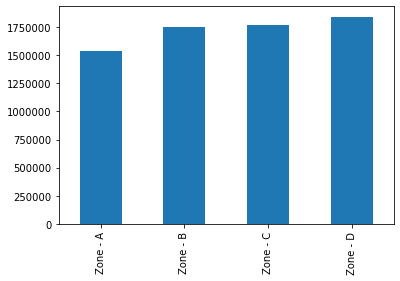

In [23]:
plt.ticklabel_format(style='plain')
data[columns].mean().plot(kind='bar');

The mean sales generated by Zone-A, Zone-B, Zone-C, Zone-D are 1540493.14, 1755559.59, 1772871.03, 1842926.76
respecively.
<br>Zone D has the highest mean sales whereas Zone A has the lowest mean sales.

# Total sales generated by all the zones for each month.

In [38]:
column_list= list(data)
column_list.remove('Month')
data['Total_Sales_Monthwise'] = data[column_list].sum(axis=1)
data[['Month', 'Total_Sales_Monthwise']]

,Month,Total_Sales_Monthwise
0,Month - 1,35112720
1,Month - 2,35761515
2,Month - 3,32379695
3,Month - 4,40872245
4,Month - 5,29976640
5,Month - 6,35756935
6,Month - 7,36435540
7,Month - 8,39081495
8,Month - 9,33516975
9,Month - 10,35641050


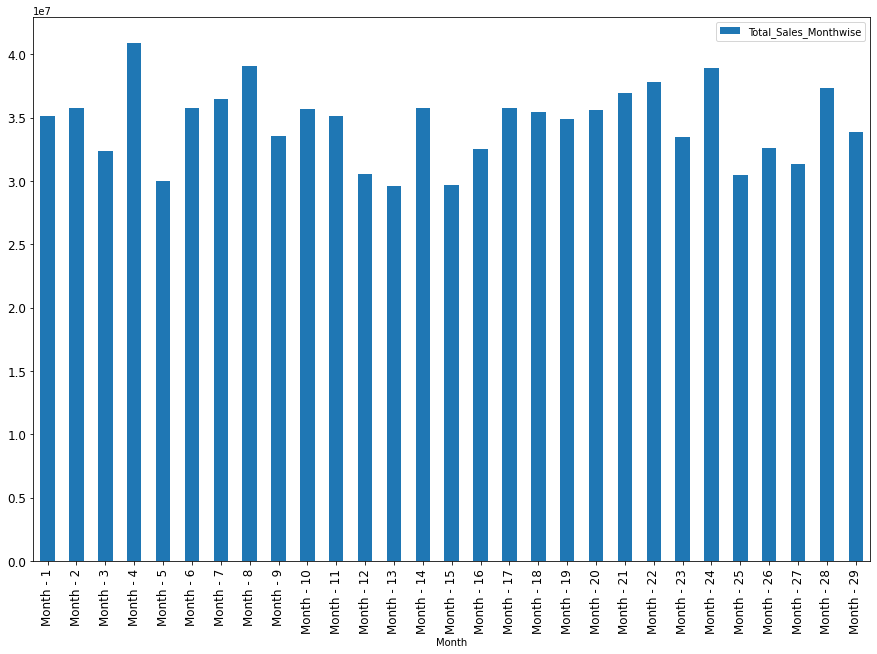

In [48]:
data.plot(kind='bar' , x='Month', y='Total_Sales_Monthwise', figsize=(15, 10), legend=True, fontsize=12);

# Check whether all the zones generate the same amount of sales.

H0 : All the zones generate the same amount of sales
<br>H1 : All the zones do not generate the same amount of sales

In [49]:
from scipy.stats import f_oneway

In [51]:
f_value, p_value  = f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])
print("The calculated F value is :", f_value)
print("The p value is :", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis H0")
else:
    print("Accept null hypothesis H0")

The calculated F value is : 5.672056106843581
The p value is : 0.0011827601694503335
Reject null hypothesis H0


Null hypothesis is rejected which implies that all the zones does not generate the same amount of sales.